## Importando bibliotecas

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-deep')
%matplotlib inline

## Lendo dados e visualizando informações básicas

In [174]:
df = pd.read_csv('..\src\data\Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Formato dos dados

In [175]:
df.shape

(10999, 12)

### Informações básicas

In [176]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


### Informações sobre o dataset

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Verificando a presença de valores nulos

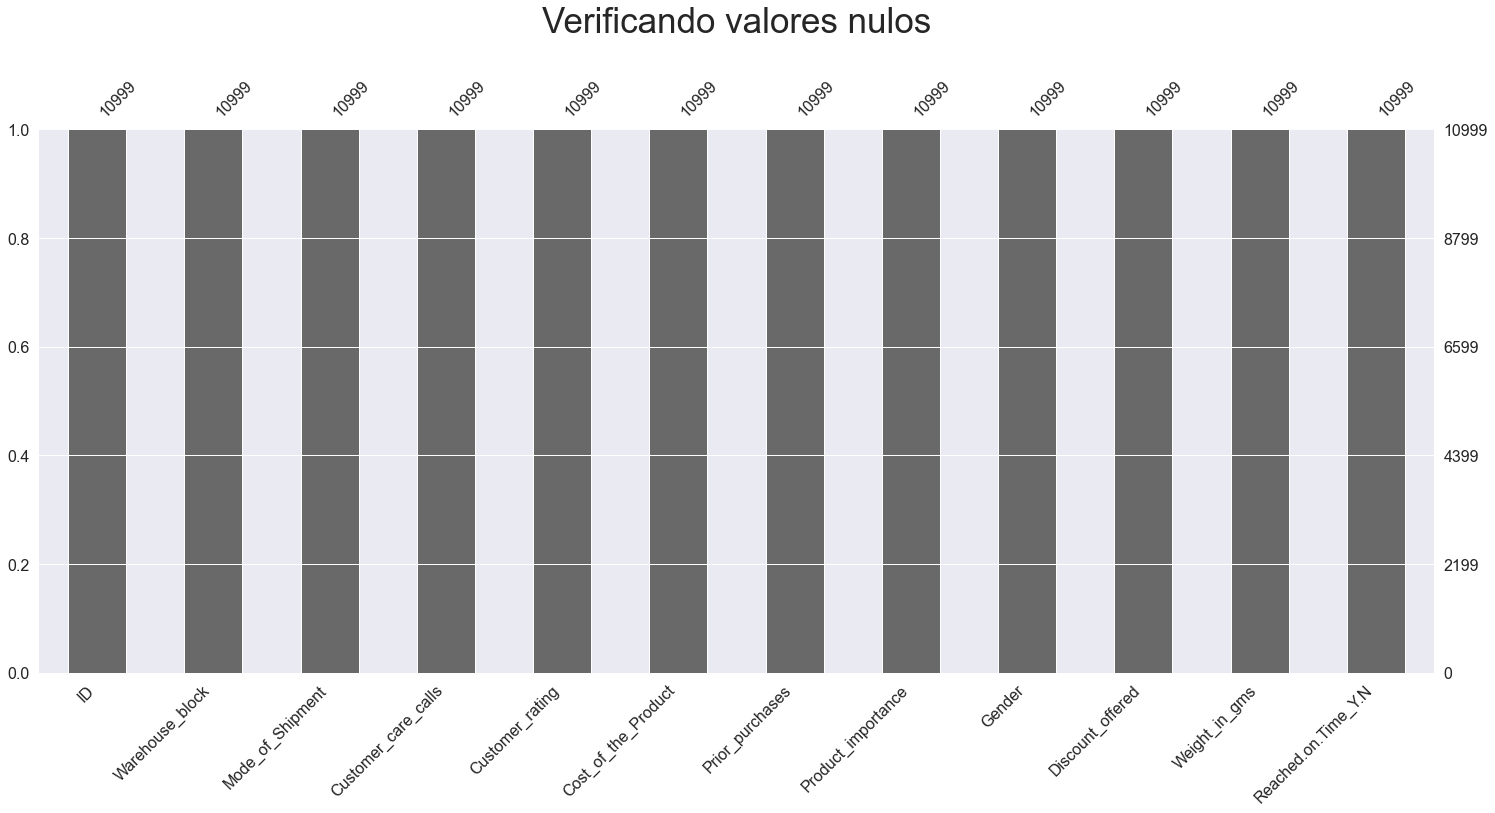

In [178]:
msno.bar(df)
plt.title('Verificando valores nulos\n', fontsize = 35)
plt.show()

### Removendo a coluna ID já que não será necessária para o trabalho

In [179]:
df.drop('ID', axis = 1, inplace = True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


Para facilitar a leitura, vamos traduzir os nomes das variáveis para o português.

In [180]:
df.columns = ['bloco_deposito', 'forma_envio', 'ligacao_consumidor',
       'nota_consumidor', 'custo_do_produto', 'compras_anteriores',
       'importancia_produto', 'genero_consumidor', 'desconto_oferecido', 'peso_em_gms',
       'entregue_data_prevista']
df.columns

Index(['bloco_deposito', 'forma_envio', 'ligacao_consumidor',
       'nota_consumidor', 'custo_do_produto', 'compras_anteriores',
       'importancia_produto', 'genero_consumidor', 'desconto_oferecido',
       'peso_em_gms', 'entregue_data_prevista'],
      dtype='object')

### Verificando a presença de correlação entre as variáveis

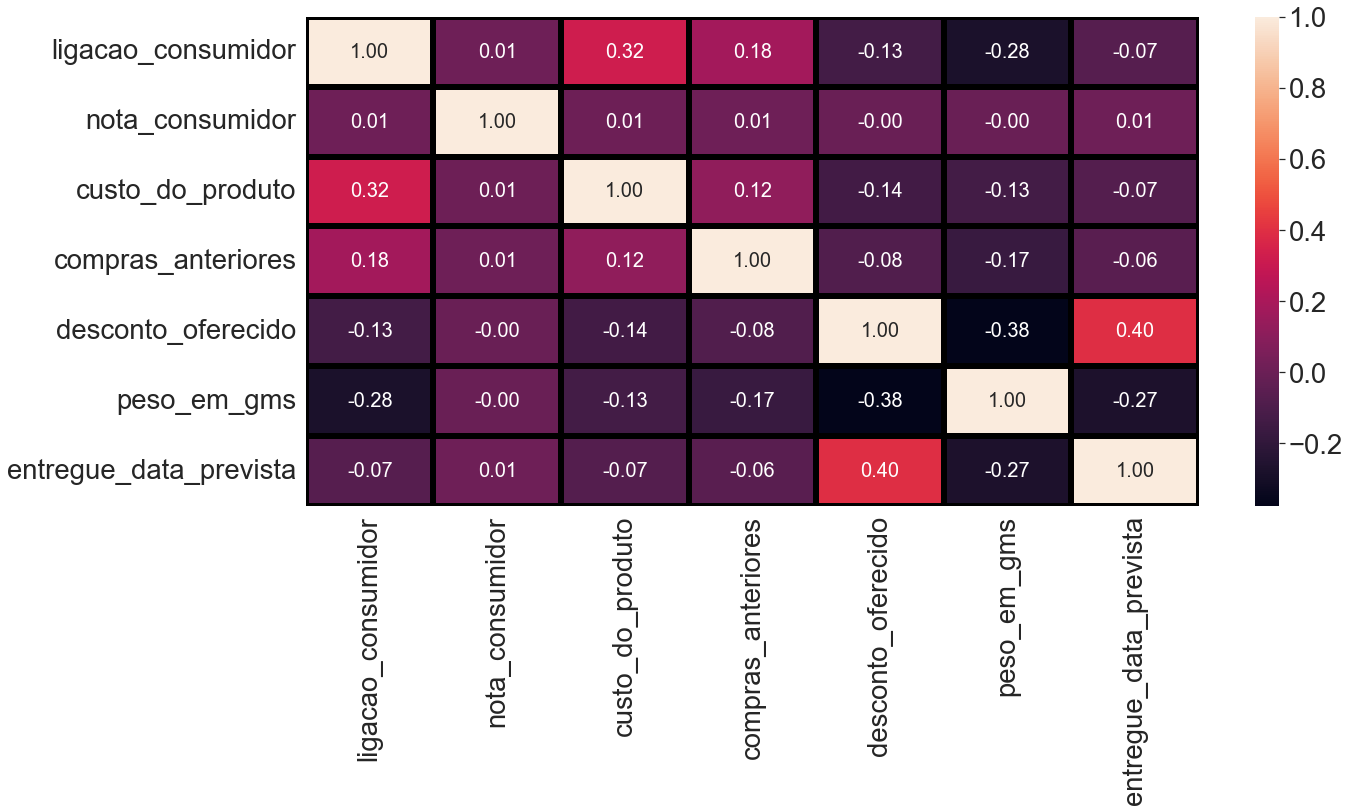

In [181]:
plt.figure(figsize = (20, 9))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 20}, linewidth = 5, linecolor = 'black')
plt.show()

Com base na matrix, podemos observar as seguintes correlações:

* Correlações positivas relevantes (acima de 30%):
    - custo do produto e ligações dos clientes (32%)
    - disconto oferecido e se o produto foi entregue na data prevista (40%)

* Correlações negativas relevantes (abaixo de -15%):
    - peso em gramas e se o produto foi entregue na data prevista (-27%)
    - peso em gramas e ligações dos clientes (-28%)
    - peso em gramas e desconto oferecido (-38%)

## Análise Exploratória

### Coletando nomes das variáveis

In [182]:
cols = ['bloco_deposito', 
        'forma_envio', 
        'ligacao_consumidor', 
        'nota_consumidor', 
        'compras_anteriores', 
        'importancia_produto', 
        'genero_consumidor', 
        'entregue_data_prevista']

In [183]:
df['entregue_data_prevista'] = df['entregue_data_prevista'].map({0 : 'S', 1: 'N'})

In [184]:
df.head()

,bloco_deposito,forma_envio,ligacao_consumidor,nota_consumidor,custo_do_produto,compras_anteriores,importancia_produto,genero_consumidor,desconto_oferecido,peso_em_gms,entregue_data_prevista
0,D,Flight,4,2,177,3,low,F,44,1233,N
1,F,Flight,4,5,216,2,low,M,59,3088,N
2,A,Flight,2,2,183,4,low,M,48,3374,N
3,B,Flight,3,3,176,4,medium,M,10,1177,N
4,C,Flight,2,2,184,3,medium,F,46,2484,N


### Verificando a divisão das variáveis categoricas

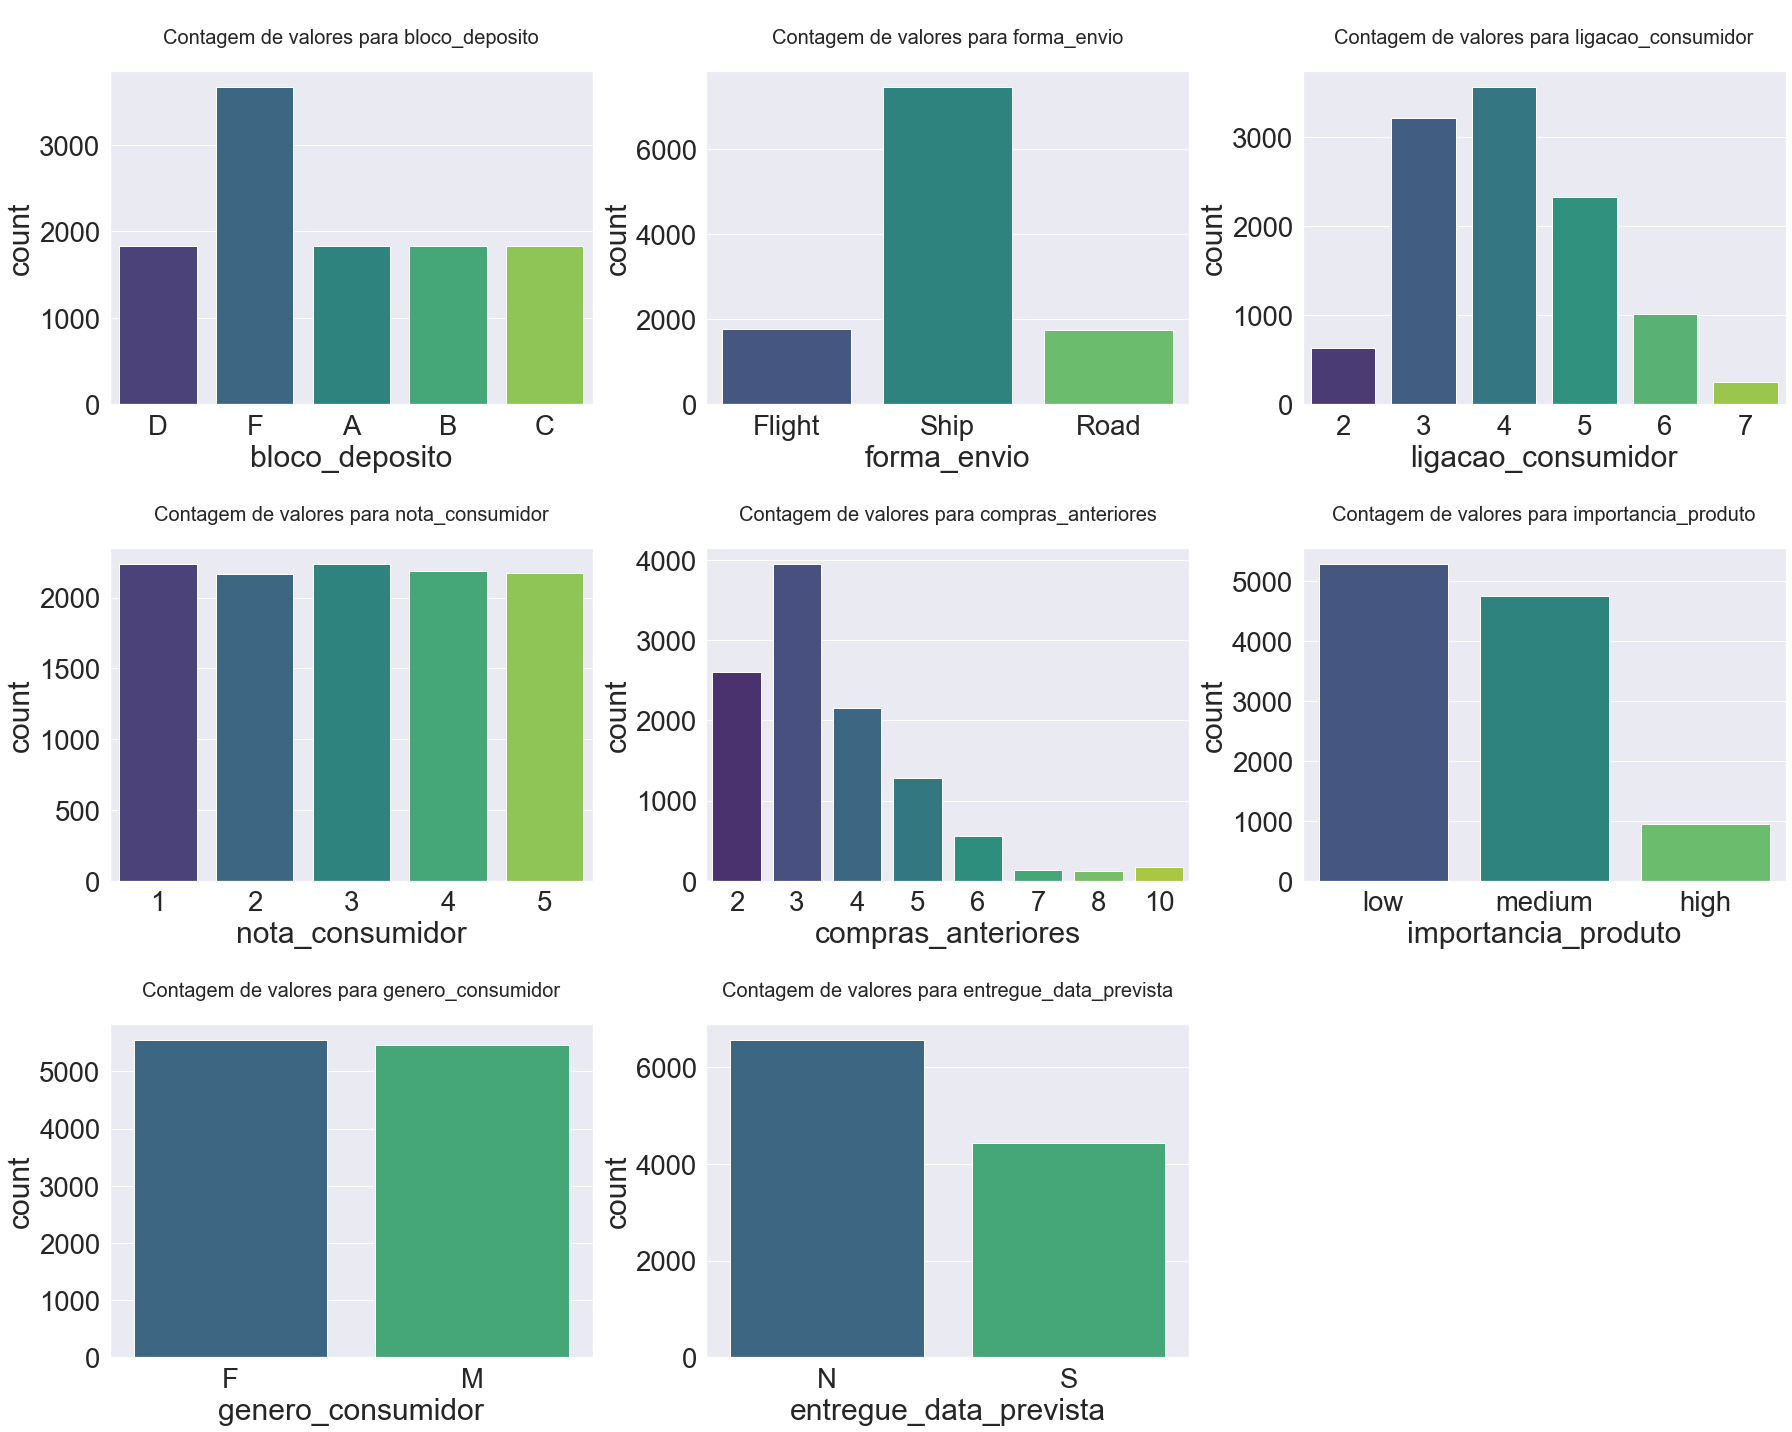

In [185]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax, palette='viridis')
        plt.title(f"\nContagem de valores para {cols[i]}\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Considerando a contagem de valores para as variáveis categóricas, podemos observar que:

- O gênero dos consumidores e a nota dadas pelos mesmos possuem valores equilibrados entre seus possíveis valores;
- O Bloco de depósito F possui predominância sobre os demais;
- Clientes com 3 compras anteriores estão em maior número que os demais;
- Produtos de baixa importância estão em maior número que os demais;
- Consumidores que realizaram 3 ou 4 ligações estão em maior número que os demais;
- É mais comum que os produtos sejam enviados por meio de embarcações;
- É mais comum que os produtos não sejam entregues na data prevista.

### Explorando a relação entre entregas na data prevista e as variáveis categóricas textuais

In [186]:
colunas_object = df.select_dtypes(include = ['object'])
colunas_object.head()

,bloco_deposito,forma_envio,importancia_produto,genero_consumidor,entregue_data_prevista
0,D,Flight,low,F,N
1,F,Flight,low,M,N
2,A,Flight,low,M,N
3,B,Flight,medium,M,N
4,C,Flight,medium,F,N


In [187]:
def mostrar_contagem(coluna, df):
    coldf = df[coluna].value_counts().reset_index()
    coldf.columns = [coluna, 'contagem']
    fig = px.bar(coldf, x='contagem', y=coluna, color=coluna, title=f'Contagem de {coluna}')
    fig.show()

    plt.figure(figsize = (17, 6))
    sns.countplot(coluna, hue = 'entregue_data_prevista', data = df, palette='viridis').set_title(f'Relação {coluna} x Entrega')
    plt.show()

#### Bloco de depósito x Entrega

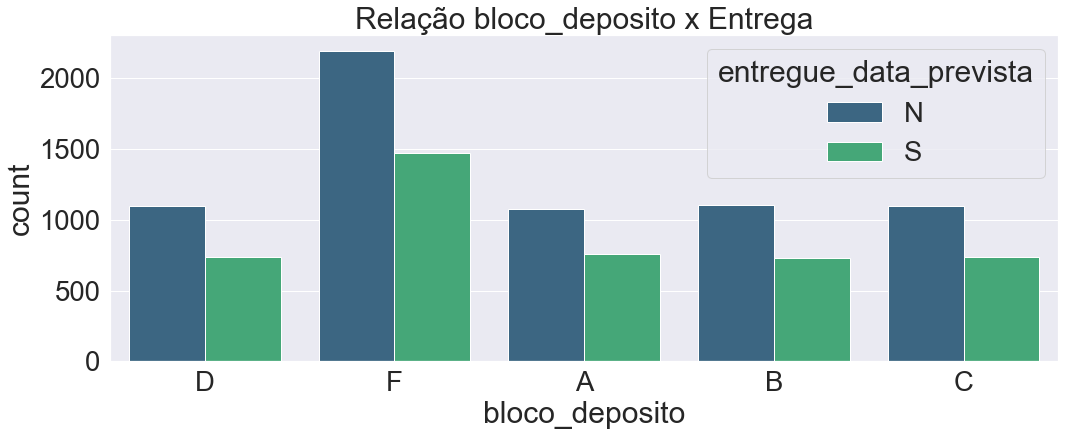

In [188]:
mostrar_contagem('bloco_deposito', colunas_object)

#### Forma de envio x Entrega

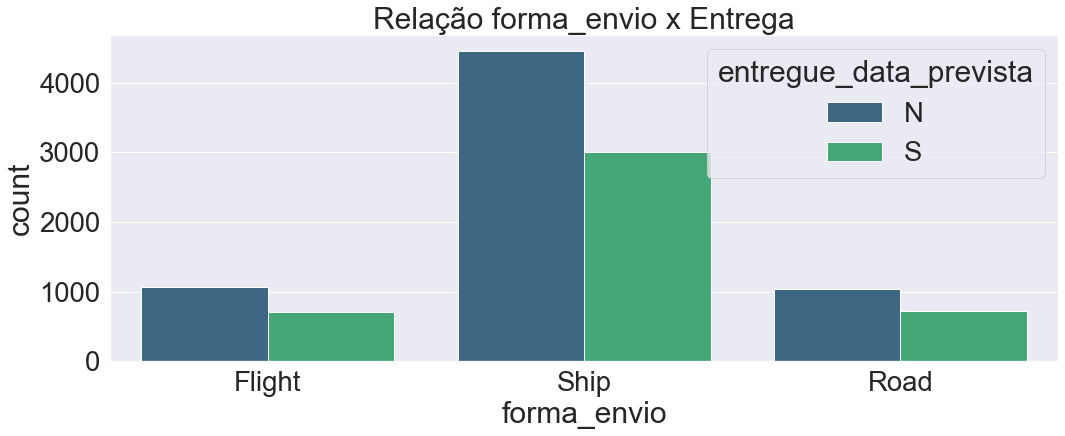

In [189]:
mostrar_contagem('forma_envio', colunas_object)

#### Importância do produto x Entrega

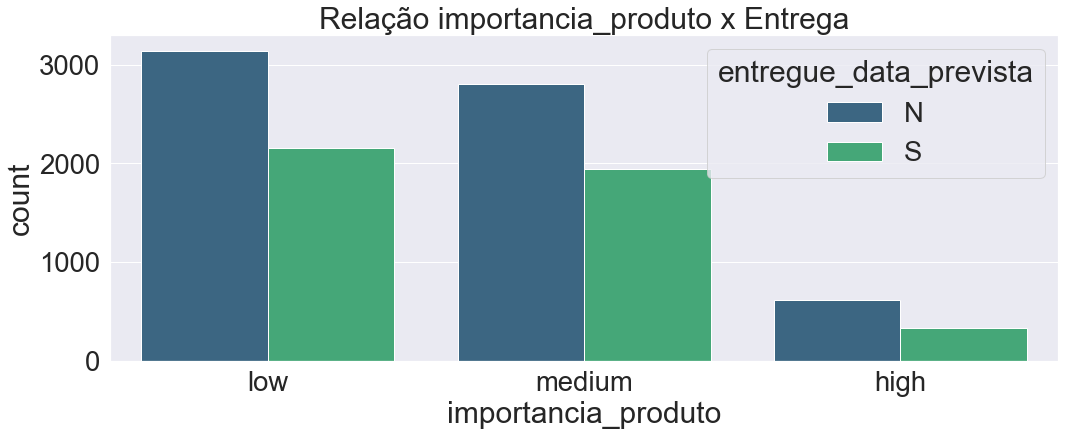

In [190]:
mostrar_contagem('importancia_produto', colunas_object)

#### Gênero do consumidor x Entrega

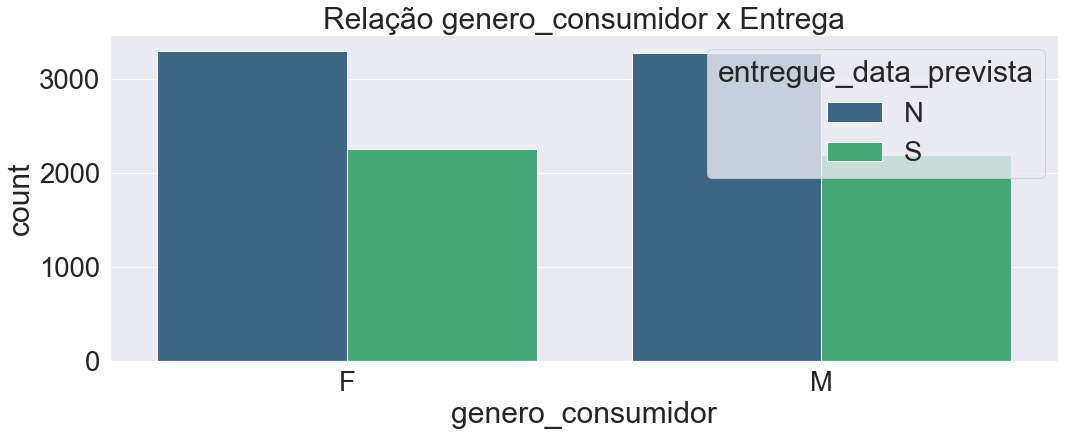

In [191]:
mostrar_contagem('genero_consumidor', colunas_object)

### Explorando a relação entre entregas na data prevista e as variáveis categóricas numéricas

In [192]:
colunas_num = df[['ligacao_consumidor', 'nota_consumidor', 'compras_anteriores', 'entregue_data_prevista']]
for col in colunas_num.columns:
    colunas_num[col] = colunas_num[col].astype('str')
colunas_num.head()

,ligacao_consumidor,nota_consumidor,compras_anteriores,entregue_data_prevista
0,4,2,3,N
1,4,5,2,N
2,2,2,4,N
3,3,3,4,N
4,2,2,3,N


#### Número de ligações por consumidor x Entrega

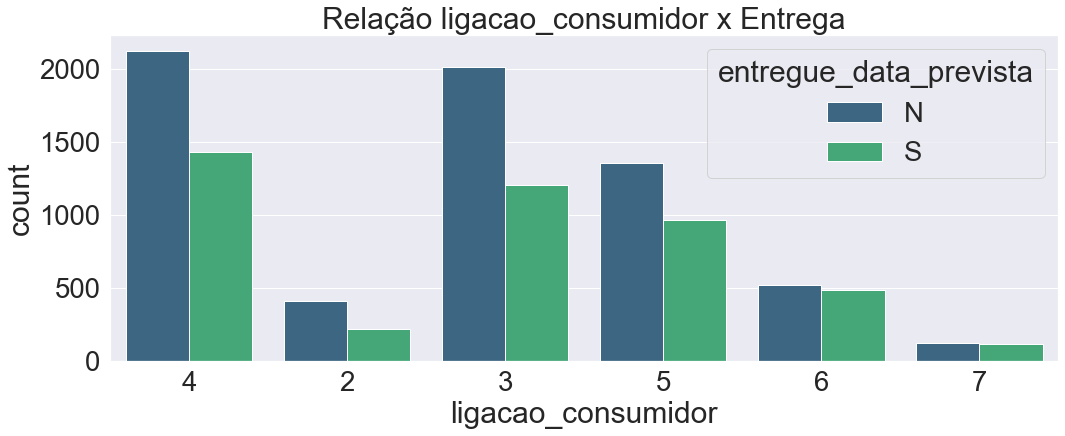

In [193]:
mostrar_contagem('ligacao_consumidor', colunas_num)

#### Nota dada pelo consumidor x Entrega

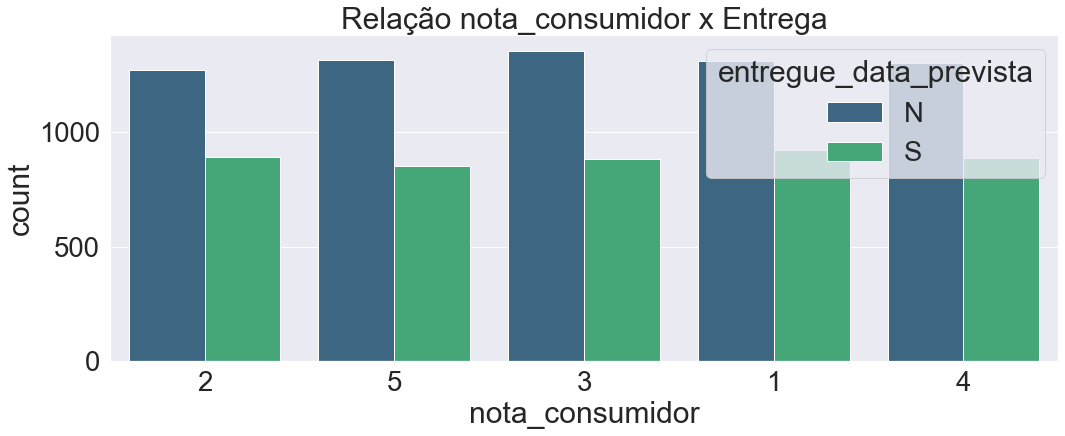

In [194]:
mostrar_contagem('nota_consumidor', colunas_num)

#### Número de compras anteriores do consumidor x Entrega

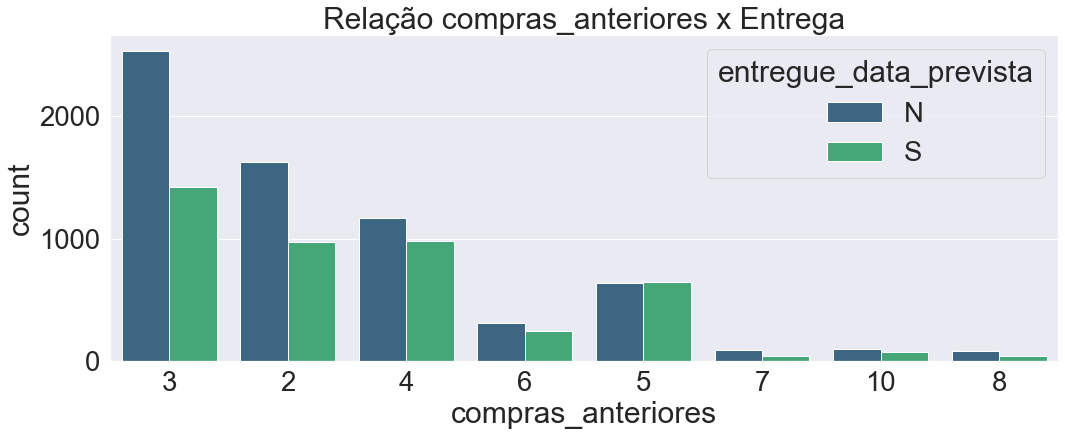

In [195]:
mostrar_contagem('compras_anteriores', colunas_num)

### Avaliando a relação entre o Desconto oferecido no produto, o custo do mesmo e se este foi entregue na data prevista

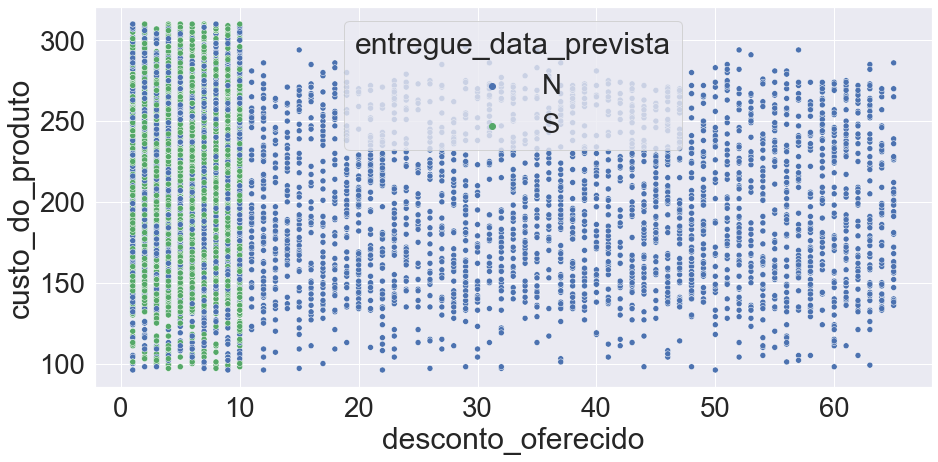

In [196]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x='desconto_oferecido', y='custo_do_produto', data=df, hue='entregue_data_prevista')

plt.show()

## Preparando dados para Treinamento

In [197]:
df['bloco_deposito'] = df['bloco_deposito'].map({'A' : 0, 'B': 1, 'C': 2, 'D':3, 'F': 4})
df['forma_envio'] = df['forma_envio'].map({'Flight' : 0, 'Ship': 1, 'Road': 2})
df['importancia_produto'] = df['importancia_produto'].map({'low' : 0, 'medium': 1, 'high': 2})
df['genero_consumidor'] = df['genero_consumidor'].apply(lambda val: 1 if val == 'M' else 0)

In [198]:
df.head()

,bloco_deposito,forma_envio,ligacao_consumidor,nota_consumidor,custo_do_produto,compras_anteriores,importancia_produto,genero_consumidor,desconto_oferecido,peso_em_gms,entregue_data_prevista
0,3,0,4,2,177,3,0,0,44,1233,N
1,4,0,4,5,216,2,0,1,59,3088,N
2,0,0,2,2,183,4,0,1,48,3374,N
3,1,0,3,3,176,4,1,1,10,1177,N
4,2,0,2,2,184,3,1,0,46,2484,N


In [199]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [201]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [202]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

8249
2750
8249
2750


## Testando modelos

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    
    dfs = []
    models = [
              ('LogReg', LogisticRegression()), 
              ('RF', RandomForestClassifier()),
              ('KNN', KNeighborsClassifier()),
              ('SVM', SVC()), 
              ('GNB', GaussianNB()),
              ('XGB', XGBClassifier())
            ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['entregue_com_atraso', 'entregue_no_tempo']
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

In [204]:
final = run_exps(X_train, y_train, X_test, y_test)

LogReg
                     precision    recall  f1-score   support

entregue_com_atraso       0.69      0.68      0.68      1615
  entregue_no_tempo       0.55      0.57      0.56      1135

           accuracy                           0.63      2750
          macro avg       0.62      0.62      0.62      2750
       weighted avg       0.63      0.63      0.63      2750

RF
                     precision    recall  f1-score   support

entregue_com_atraso       0.73      0.65      0.69      1615
  entregue_no_tempo       0.57      0.66      0.61      1135

           accuracy                           0.66      2750
          macro avg       0.65      0.66      0.65      2750
       weighted avg       0.67      0.66      0.66      2750

KNN
                     precision    recall  f1-score   support

entregue_com_atraso       0.71      0.67      0.69      1615
  entregue_no_tempo       0.57      0.62      0.59      1135

           accuracy                           0.65      2750
  

## Avaliando modelos

In [205]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time']

results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit = results_long_nofit.sort_values(by='values')

results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_fit.sort_values(by='values')

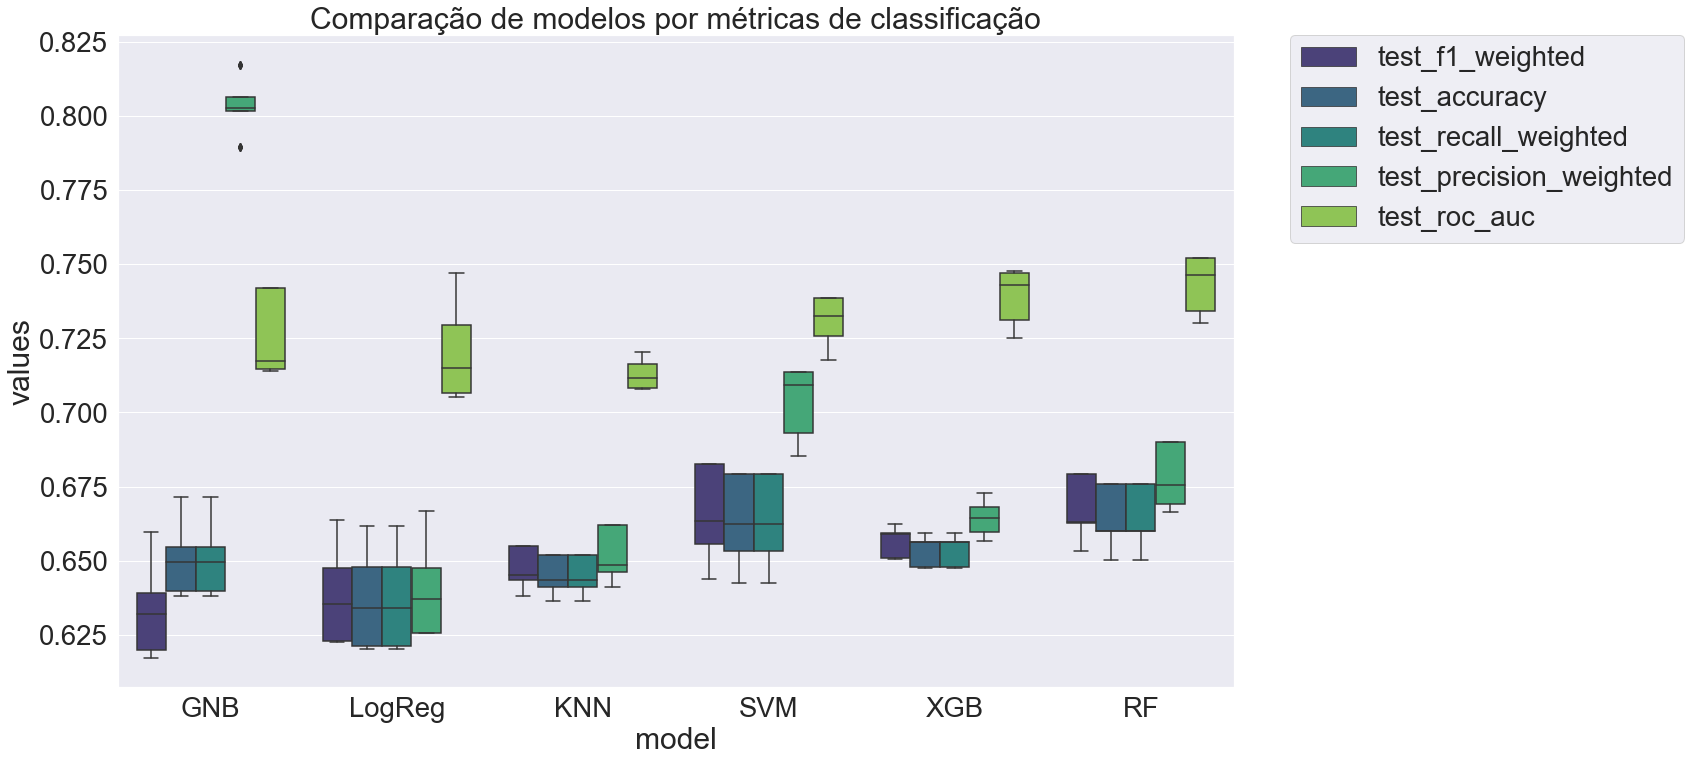

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="viridis")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparação de modelos por métricas de classificação')
plt.savefig('./benchmark_performance_modelos.png',dpi=300)

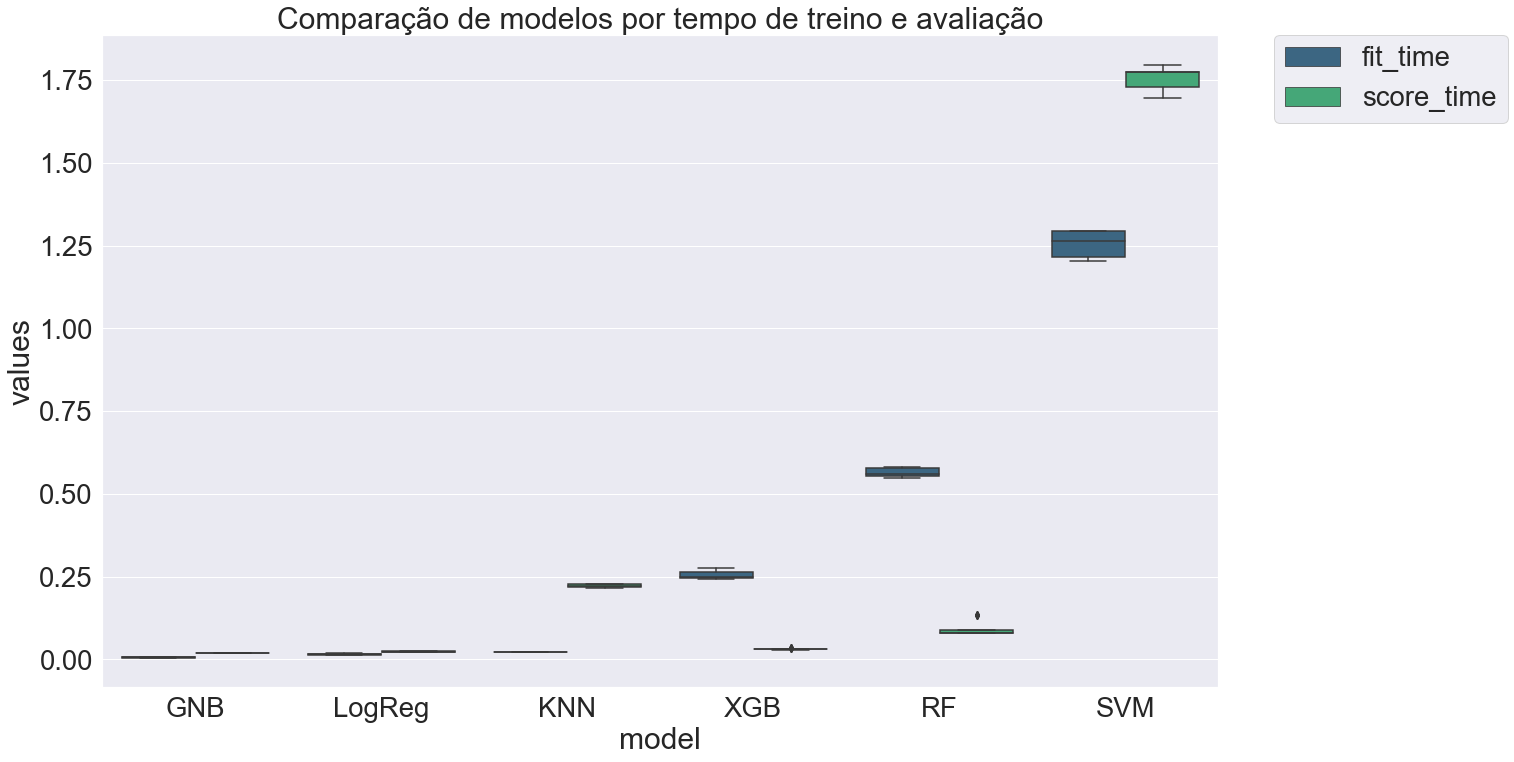

In [207]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="viridis")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparação de modelos por tempo de treino e avaliação')
plt.savefig('./benchmark_modelos_tempo.png',dpi=300)

In [208]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_recall_weighted           test_roc_auc            \
                        std      mean          std      mean   
model                                                          
GNB                0.012664  0.651820     0.012686  0.724367   
KNN                0.005249  0.644785     0.004609  0.713243   
LogReg             0.016753  0.637898     0.016441  0.721903   
RF                 0.008508  0.663541     0.009045  0.741906   
SVM                0.012876  0.663939     0.006556  0.731420   
XGB                0.004714  0.653338     0.008935  0.738825   

       test_precision_weighted           test_f1_weighted            \
                           std      mean              std      mean   
model                                                                 
GNB                   0.009729  0.803154         0.015763  0.635147   
KNN                   0.007406  0.651350         0.005665  0.647014   
LogReg                0.016575  0.641166         0.016620  0.639187   
RF                    0.008934  0.677584         0.008657  0.666732   
SVM                   0.010298  0.703600         0.013680  0.666095   
XGB                   0.005605  0.663747         0.004810  0.656233   

       test_accuracy            
                 std      mean  
model                           
GNB         0.012664  0.651820  
KNN         0.005249  0.644785  
LogReg      0.016753  0.637898  
RF          0.008508  0.663541  
SVM         0.012876  0.663939  
XGB         0.004714  0.653338

In [209]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

fit_time           score_time          
             std      mean        std      mean
model                                          
GNB     0.000496  0.005638   0.000497  0.019599
KNN     0.000789  0.021703   0.004948  0.221991
LogReg  0.001736  0.015662   0.001064  0.023563
RF      0.013192  0.564488   0.022270  0.091809
SVM     0.033809  1.256654   0.037863  1.755068
XGB     0.012489  0.257800   0.001856  0.030933

## Treinando o modelo com melhor acurácia

In [210]:
target_names = ['entregue_com_atraso', 'entregue_no_tempo']
modelo = GaussianNB()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

entregue_com_atraso       0.97      0.41      0.57      1615
  entregue_no_tempo       0.54      0.98      0.70      1135

           accuracy                           0.64      2750
          macro avg       0.75      0.69      0.63      2750
       weighted avg       0.79      0.64      0.62      2750



## Salvando melhor modelo

In [211]:
import pickle
modelo_salvo = 'modelo_gnb.pkl'
pickle.dump(modelo, open(modelo_salvo, 'wb'))